<a href="https://colab.research.google.com/github/SayaliJadhav2109/SCT_TrackCode_Task_1/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: ['Accident ID', 'Date', 'Time', 'Location', 'Latitude', 'Longitude', 'Weather Condition', 'Road Condition', 'Vehicles Involved', 'Casualties', 'Cause']


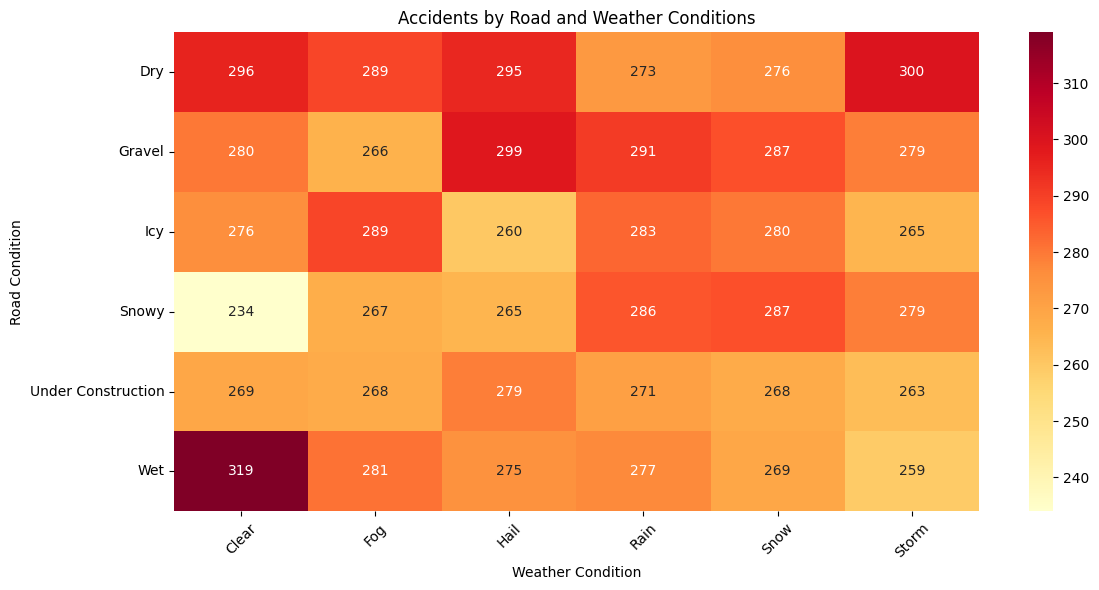

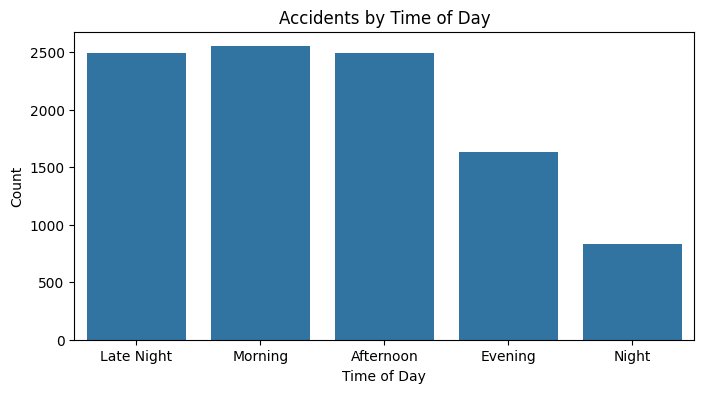

✅ Accident hotspots map saved as 'accident_hotspots.html'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load your CSV
df = pd.read_csv('/content/sample_data/global_traffic_accidents.csv')

# Print columns
print("Columns:", df.columns.tolist())

# Clean column names (optional but helpful)
df.columns = df.columns.str.strip()

# Create full datetime column by combining 'Date' and 'Time'
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Drop rows with missing data
df.dropna(subset=['DateTime', 'Weather Condition', 'Road Condition', 'Latitude', 'Longitude'], inplace=True)

# Extract hour and time segment
df['Hour'] = df['DateTime'].dt.hour
df['Time_of_Day'] = pd.cut(df['Hour'],
                           bins=[-1, 5, 11, 17, 21, 24],
                           labels=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'])

# ------------------ 🔥 Heatmap: Road vs Weather ------------------
plt.figure(figsize=(12, 6))
pivot = df.pivot_table(index='Road Condition', columns='Weather Condition', values='Hour', aggfunc='count')
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Accidents by Road and Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------ 📊 Barplot: Time of Day ------------------
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Time_of_Day', order=['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Accidents by Time of Day')
plt.ylabel("Count")
plt.xlabel("Time of Day")
plt.show()

# ------------------ 🌍 Heatmap: Location Hotspots ------------------
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)
heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius=10).add_to(m)

# Save interactive map
m.save("accident_hotspots.html")
print("✅ Accident hotspots map saved as 'accident_hotspots.html'")
